In [5]:
!python3 --version
!python3 -m pip install seaborn

Python 3.6.9
  Using cached https://files.pythonhosted.org/packages/68/ad/6c2406ae175f59ec616714e408979b674fe27b9587f79d59a528ddfbcd5b/seaborn-0.11.1-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/c8/89/63171228d5ced148f5ced50305c89e8576ffc695a90b58fe5bb602b910c2/scipy-1.5.4-cp36-cp36m-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/c3/e2/00cacecafbab071c787019f00ad84ca3185952f6bb9bca9550ed83870d4d/pandas-1.1.5-cp36-cp36m-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/09/03/b7b30fa81cb687d1178e085d0f01111ceaea3bf81f9330c937fb6f6c8ca0/matplotlib-3.3.4-cp36-cp36m-manylinux1_x86_64.whl
  Cache entry deserialization failed, entry ignored
  Using cached https://files.pythonhosted.org/packages/45/b2/6c7545bb7a38754d63048c7696804a0d947328125d81bf12beaa692c3ae3/numpy-1.19.5-cp36-cp36m-manylinux1_x86_64.whl
  Cache entry deserialization failed, entry ignored
  Using cached https://files.pythonhosted.org/packages

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 

In [2]:
import seaborn as sns

In [3]:
#fc = 3 * U_star/(2 * epsilon_star) 
#beta = kb * T / (fdot * epsilon_star)
#alpha = np.sqrt(1 - f/fc)
#rf = ro * alpha * np.exp( (U_star/(kb * T)) * (1 - np.power(alpha,3)) )
#p_fdot = (rf / fdot ) * np.exp(ro * beta) * np.exp(-rf * beta / alpha) 

In [4]:
fdot_a = 0.061863
fdot_b = 0.18775
fdot_c = 1.8184
ro = 1e-8 # Given Guess value
epsilon_star = 10 # Given Guess value
U_star = 700 # Given Guess value
fc = (3 * U_star)/(2 * epsilon_star) 
print("fc: " + str(fc))

fc: 105.0


In [5]:
from scipy import constants 

In [6]:
print(constants.physical_constants["Boltzmann constant"])
kb = constants.physical_constants["Boltzmann constant"][0] # Using scipy constants to get Boltzmann value
print(kb)
T = 293 #Taking room temp as 293K
beta_a = kb * T / (fdot_a * epsilon_star)
beta_b = kb * T / (fdot_b * epsilon_star)
beta_c = kb * T / (fdot_c * epsilon_star)


(1.380649e-23, 'J K^-1', 0.0)
1.380649e-23


In [7]:
print("fdot_a: " + str(fdot_a) + " beta_a: " + str(beta_a))
print("fdot_b: " + str(fdot_b) + " beta_b: " + str(beta_b))
print("fdot_c: " + str(fdot_c) + " beta_c: " + str(beta_c))

fdot_a: 0.061863 beta_a: 6.53912931800915e-21
fdot_b: 0.18775 beta_b: 2.1546213422103866e-21
fdot_c: 1.8184 beta_c: 2.2246489056313245e-22


In [8]:
def alpha(f,fc):
    return np.sqrt(1 - f/fc)

In [9]:
#alpha(fig_a.iloc[:,0],fc)

In [10]:
fig_a = pd.read_csv('/home/manju838/coding/env/pytorch_env/OE_Project/Data_fig_a.dat.csv',sep = '\t')
fig_b = pd.read_csv('/home/manju838/coding/env/pytorch_env/OE_Project/Data_fig-b.dat.csv',sep = '\t')
fig_c = pd.read_csv('/home/manju838/coding/env/pytorch_env/OE_Project/Data_fig-c.dat.csv',sep = '\t')
fig_a.head()

,#f,p,fdot
0,30.122942,0.001555,0.061863
1,32.266466,0.000000,0.061863
2,34.409990,0.003110,0.061863
3,36.553514,0.018661,0.061863
4,38.697038,0.024881,0.061863


In [11]:
data = {'f':fig_a.iloc[:,0], 'p':fig_a.iloc[:,1],'fdot':fig_a.iloc[:,2],'alpha':alpha(fig_a.iloc[:,0],fc)}
fig_a = pd.DataFrame(data = data)

data = {'f':fig_b.iloc[:,0], 'p':fig_b.iloc[:,1],'fdot':fig_b.iloc[:,2],'alpha':alpha(fig_b.iloc[:,0],fc)}
fig_b = pd.DataFrame(data = data)

data = {'f':fig_c.iloc[:,0], 'p':fig_c.iloc[:,1],'fdot':fig_c.iloc[:,2],'alpha':alpha(fig_c.iloc[:,0],fc)}
fig_c = pd.DataFrame(data = data)


In [12]:
fig_a.head()

,f,p,fdot,alpha
0,30.122942,0.001555,0.061863,0.844461
1,32.266466,0.000000,0.061863,0.832286
2,34.409990,0.003110,0.061863,0.819930
3,36.553514,0.018661,0.061863,0.807385
4,38.697038,0.024881,0.061863,0.794643


In [23]:
rf = ro * fig_a['alpha'][0] * np.exp( (U_star/(kb * T)) * (1 - np.power(fig_a['alpha'][0],3)) )
rf

inf

In [24]:
print((U_star/(kb * T) ))
print(np.exp( (U_star/(kb * T) ))) #This value is order x = (10^23)
print(np.exp(1e+2))
print(np.exp(1e+3)) #Python can only handle order 10^2,above that everything is infinity

1.7304025123644858e+23
inf
2.6881171418161356e+43
inf


In [25]:
ro * fig_a['alpha'][0] * np.exp((1 - np.power(fig_a['alpha'][0],3))) #So the term np.exp( (U_star/kb * T) is troubling us

1.2570223795158311e-08

In [16]:
rf = ro * fig_a['alpha'] * np.exp( (1 - np.power(fig_a['alpha'],3)) ) #I am scaling down by np.exp( (U_star/kb * T),so graph comparison must not be a problem
fig_a.insert(4,"scaled_rf_a",rf)
fig_a.head()

rf = ro * fig_b['alpha'] * np.exp( (1 - np.power(fig_b['alpha'],3)) ) #I am scaling down by np.exp( (U_star/kb * T),so graph comparison must not be a problem
fig_b.insert(4,"scaled_rf_b",rf)

rf = ro * fig_c['alpha'] * np.exp( (1 - np.power(fig_c['alpha'],3)) ) #I am scaling down by np.exp( (U_star/kb * T),so graph comparison must not be a problem
fig_c.insert(4,"scaled_rf_c",rf)


In [17]:
fig_b.head()

,f,p,fdot,alpha,scaled_rf_b
0,31.451082,0.005012,0.18775,0.836938,1.265856e-08
1,33.473406,0.005012,0.18775,0.825352,1.278670e-08
2,35.495730,0.008353,0.18775,0.813600,1.290662e-08
3,37.518054,0.013364,0.18775,0.801676,1.301769e-08
4,39.540378,0.021717,0.18775,0.789573,1.311927e-08


In [18]:
p_fdot = (fig_a['scaled_rf_a'] / fig_a['fdot'] ) * np.exp(ro * beta_a) * np.exp(-fig_a['scaled_rf_a'] * beta_a / fig_a['alpha']) 
fig_a.insert(5,"p_fdot_a",p_fdot)
fig_a.head()

p_fdot = (fig_b['scaled_rf_b'] / fig_b['fdot'] ) * np.exp(ro * beta_b) * np.exp(-fig_b['scaled_rf_b'] * beta_b / fig_b['alpha']) 
fig_b.insert(5,"p_fdot_b",p_fdot)
fig_b.head()

p_fdot = (fig_c['scaled_rf_c'] / fig_c['fdot'] ) * np.exp(ro * beta_c) * np.exp(-fig_c['scaled_rf_c'] * beta_c / fig_c['alpha']) 
fig_c.insert(5,"p_fdot_c",p_fdot)
fig_c.head()

,f,p,fdot,alpha,scaled_rf_c,p_fdot_c
0,34.153584,0.004037,1.8184,0.821418,1.282798e-08,7.054541e-09
1,36.647113,0.001346,1.8184,0.806833,1.297098e-08,7.133183e-09
2,39.140641,0.000000,1.8184,0.791980,1.309998e-08,7.204124e-09
3,41.634170,0.002692,1.8184,0.776842,1.321371e-08,7.266671e-09
4,44.127698,0.005383,1.8184,0.761404,1.331086e-08,7.320097e-09


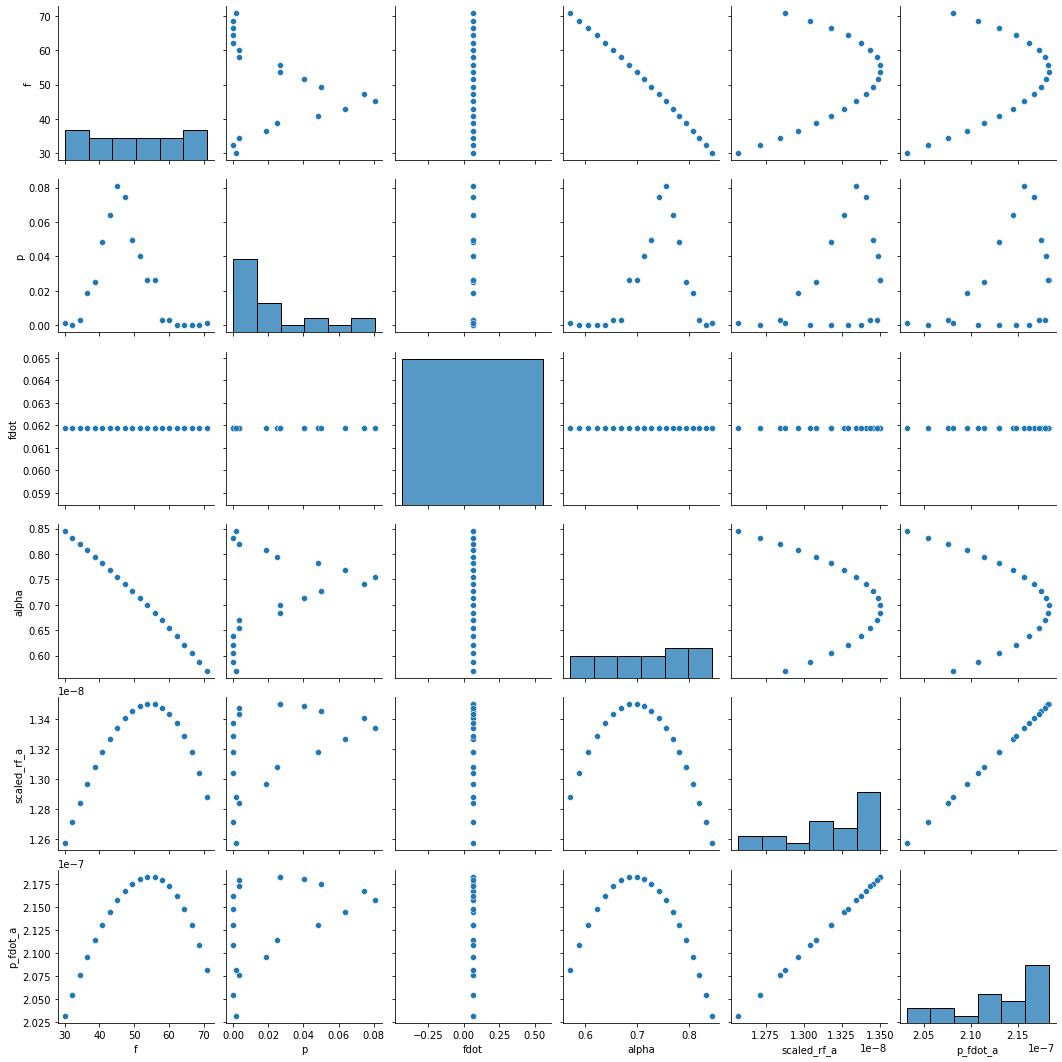

In [56]:
sns.pairplot(fig_a)

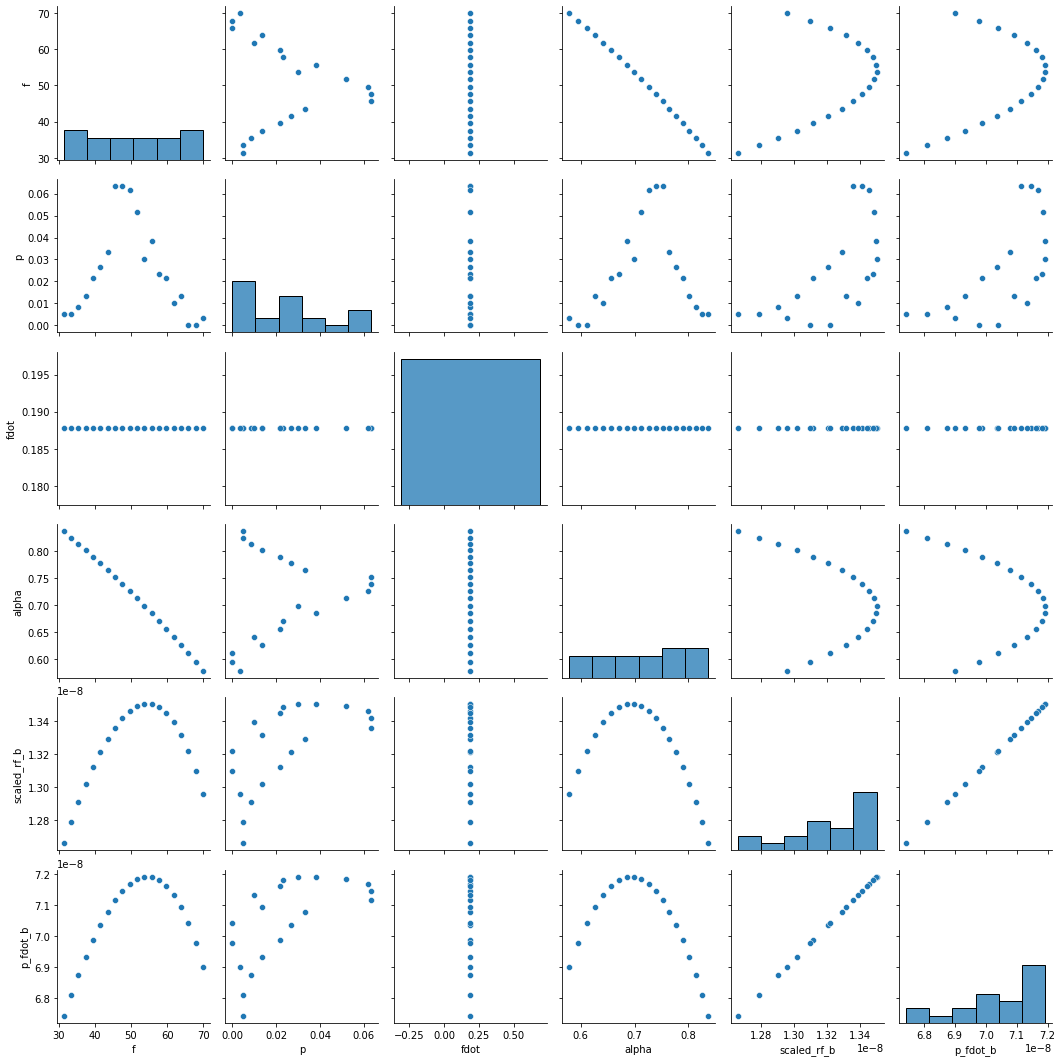

In [61]:
sns.pairplot(fig_b)

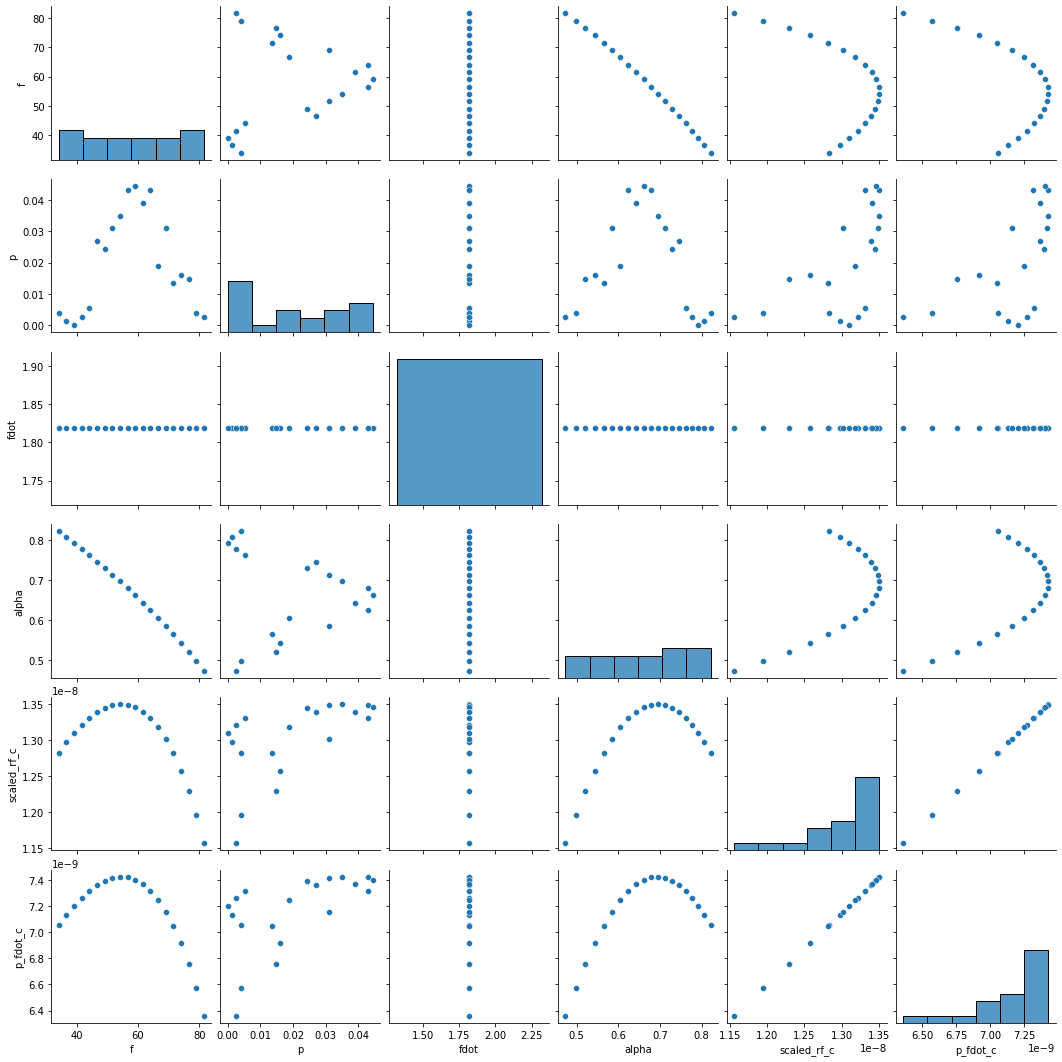

In [59]:
sns.pairplot(fig_c)

<AxesSubplot:xlabel='p_fdot_a', ylabel='Density'>

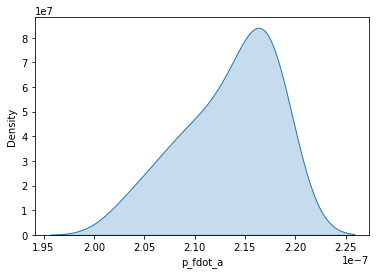

In [80]:
sns.kdeplot(fig_a['p_fdot_a'] ,shade = True ,fill=True)

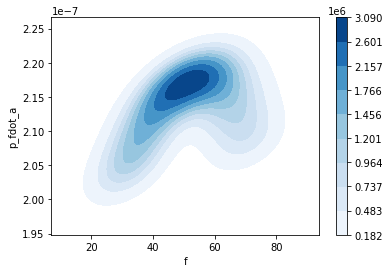

In [74]:
res = sns.kdeplot(fig_a['f'] ,fig_a['p_fdot_a'],color='blue',shade=True,cmap="Blues",cbar = True)
plt.show()

<AxesSubplot:xlabel='p_fdot_b', ylabel='Density'>

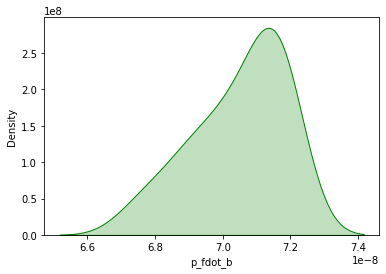

In [81]:
sns.kdeplot(fig_b['p_fdot_b'] ,shade = True ,color = 'green' ,fill=True)

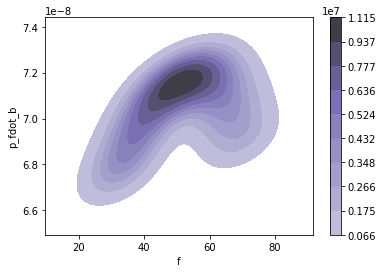

In [75]:
res = sns.kdeplot(fig_b['f'] ,fig_b['p_fdot_b'],color='green',shade=True,cmap="Purples_d",cbar = True)
plt.show()

<AxesSubplot:xlabel='p_fdot_c', ylabel='Density'>

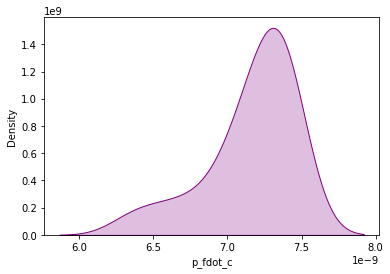

In [83]:
sns.kdeplot(fig_c['p_fdot_c'] ,shade = True ,color = 'purple' ,fill=True)

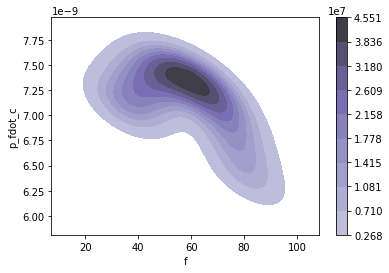

In [76]:
res = sns.kdeplot(fig_c['f'] ,fig_c['p_fdot_c'],color='purple',shade=True,cmap="Purples_d",cbar = True)
plt.show()